I have the clean data from the previous step that includes:

## X7
ds: in datetime format <br>
TMAX_7avg: 7 day average of max temperature <br>
TMIN_7avg: 7 day average of min temperature <br>
TOBS_7avg: 7-day average of observed temperature <br>
PDO: pacific decadal oscillation; data given by the month but interpolated to the day <br>
AMO: atlantic decadal oscillation; data measure by the month but interpolated to the day <br>
PRCP: water equivalent (in) or precipitation (if all the snow was melted down to water) <br>
y: 7-day snowfall total

## X14
ds: in datetime format <br>
TMAX_14avg: 14-day average of max temperature <br>
TMIN_14avg: 14-day average of min temperature <br>
TOBS_14avg: 14-day average of observed temperature <br>
PDO: pacific decadal oscillation; data given by the month but interpolated to the day <br>
AMO: atlantic decadal oscillation; data measure by the month but interpolated to the day <br>
PRCP: water equivalent (in) or precipitation (if all the snow was melted down to water) <br>
y: 14-day snowfall total

## X30
ds: in datetime format <br>
TMAX_30avg: 30-day average of max temperature <br>
TMIN_30avg: 30-day average of min temperature <br>
TOBS_30avg: 30-day average of observed temperature <br>
PDO: pacific decadal oscillation; data given by the month but interpolated to the day <br>
AMO: atlantic decadal oscillation; data measure by the month but interpolated to the day <br>
PRCP: water equivalent (in) or precipitation (if all the snow was melted down to water) <br>
y: 30-day snowfall total




In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import ppscore as pps
from fbprophet import Prophet
import featuretools as ft

In [2]:
import pickle
path="C:\Springboard\Github\Capstone1_alta\intermediate_data"
os.chdir(path)

In [3]:
X7 = pickle.load(open("X7_snow_pp.pkl", "rb"))


,ds,TMAX_7avg,TMIN_7avg,TOBS_7avg,PDO,AMO,y,PRCP
0,1944-11-21,36.736971,18.821202,26.551428,-0.48,0.272,0.0,0.00
1,1944-11-22,36.468501,18.626804,26.318706,-0.48,0.272,0.0,0.00
2,1944-11-23,35.907657,18.275119,25.773843,-0.48,0.272,0.0,0.00
3,1944-11-24,35.602554,17.895432,25.561157,-0.48,0.272,0.0,0.82
4,1944-11-25,35.568962,17.693867,25.509994,-0.48,0.272,0.0,0.06


In [4]:
X14 = pickle.load(open("X14_snow_pp.pkl", "rb"))


,ds,TMAX_14avg,TMIN_14avg,TOBS_14avg,PDO,AMO,y,PRCP
21798,2020-05-06,52.000000,34.357143,46.500000,-0.760000,0.290200,2.5,0.00
21799,2020-05-07,52.642857,33.857143,46.785714,-0.733333,0.286733,2.0,0.00
21800,2020-05-08,53.357143,34.000000,47.500000,-0.706667,0.283267,0.4,0.00
21801,2020-05-09,53.714286,33.785714,47.928571,-0.680000,0.279800,0.4,0.00
21802,2020-05-10,54.357143,33.500000,48.285714,-0.653333,0.276333,0.4,0.00
21803,2020-05-11,54.642857,33.785714,49.000000,-0.626667,0.272867,0.4,0.00
21804,2020-05-12,55.071429,34.285714,49.142857,-0.600000,0.269400,0.4,0.00
21805,2020-05-13,54.357143,34.071429,48.142857,-0.573333,0.265933,0.4,0.01
21806,2020-05-14,53.357143,33.214286,48.142857,-0.546667,0.262467,0.4,0.00
21807,2020-05-15,52.500000,32.928571,48.428571,-0.520000,0.259000,0.4,0.00


In [5]:
X30 = pickle.load(open("X30_snow_pp.pkl", "rb"))

,ds,TMAX_30avg,TMIN_30avg,TOBS_30avg,PDO,AMO,y,PRCP
21798,2020-05-06,45.333333,28.266667,40.466667,-0.760000,0.290200,18.8,0.00
21799,2020-05-07,45.566667,28.033333,40.466667,-0.733333,0.286733,18.2,0.00
21800,2020-05-08,45.533333,27.966667,40.466667,-0.706667,0.283267,18.2,0.00
21801,2020-05-09,45.600000,27.833333,40.900000,-0.680000,0.279800,18.2,0.00
21802,2020-05-10,46.200000,28.100000,41.400000,-0.653333,0.276333,18.2,0.00
21803,2020-05-11,46.833333,28.533333,42.233333,-0.626667,0.272867,18.2,0.00
21804,2020-05-12,47.600000,29.333333,43.166667,-0.600000,0.269400,17.0,0.00
21805,2020-05-13,48.533333,30.000000,44.033333,-0.573333,0.265933,15.3,0.01
21806,2020-05-14,49.066667,30.800000,44.566667,-0.546667,0.262467,15.3,0.00
21807,2020-05-15,49.566667,31.166667,45.066667,-0.520000,0.259000,12.5,0.00


I was going to run deep feature sythesis on this to create more possible features, but that doesn't seem to work. Instead I will just run FB Prophet and see if I can come back to this step after I finish with more time series modeling. 

In [6]:
# create a new entity set in featuretools
#es7 = ft.EntitySet(id='X7')
# This dataframe already has an index and a time index
#es7 = es7.entity_from_dataframe(entity_id = 'X7', dataframe = X7, time_index = 'ds')

# Run deep feature synthesis with transformation primitives
#feature7_matrix, feature7_defs = ft.dfs(entityset = es7, target_entity = 'y')

#feature7_matrix.head()


# I'm going to save this feature tools until I understand it a little better and just run FB Prophet
# https://stackoverflow.com/questions/52418152/featuretools-can-it-be-applied-on-a-single-table-to-generate-features-even-when
# https://docs.featuretools.com/en/stable/automated_feature_engineering/afe.html
# https://docs.featuretools.com/en/stable/api_reference.html#feature-encoding
# https://docs.featuretools.com/en/stable/loading_data/using_entitysets.html
# https://docs.featuretools.com/en/stable/automated_feature_engineering/handling_time.html
# https://towardsdatascience.com/automated-feature-engineering-in-python-99baf11cc219

In [7]:
# slice off the last year of the X7 df to save to calculate error - may need to use boolean logic to extract these rows.
year = 2018
# split date between test and train data set
split_date = str(year) + '-11-14'
# end date of the test set
end_date = str(year+1) + '-04-15'
train = X7['ds'] <= split_date
X7_train = X7.loc[train]
# data set from the split until the end of data keeping
X7_long = X7.loc[~train]
# shorten this data for just the next winter
X7_test = X7_long[X7_long['ds'] <= end_date]

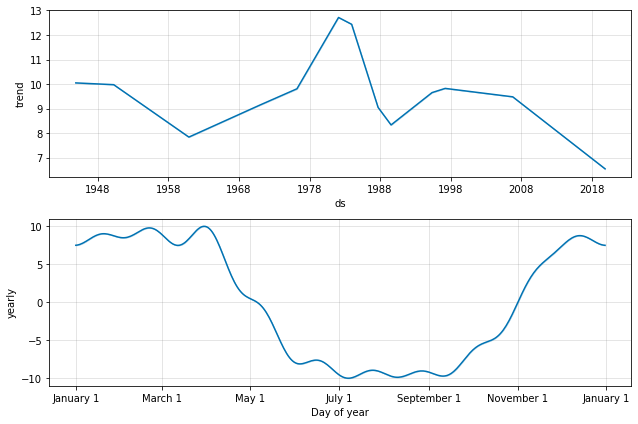

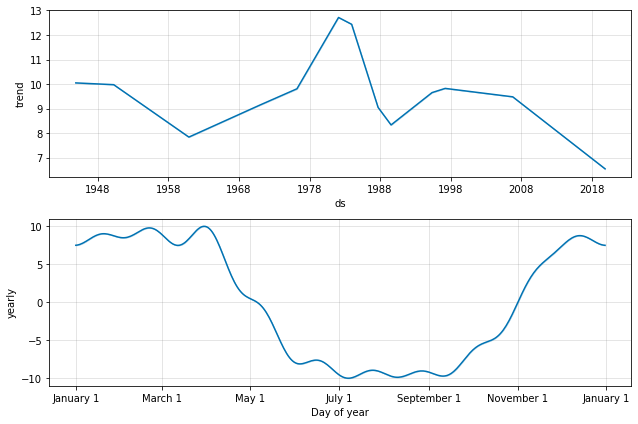

In [8]:
# let's take a better look at this with FB's Prophet - not considering any other regressors
from fbprophet import Prophet
m_fb = Prophet(yearly_seasonality = True, daily_seasonality=False, weekly_seasonality=False)
m_fb.fit(X7_train)
future = m_fb.make_future_dataframe(periods=365)
forecast = m_fb.predict(future)
m_fb.plot_components(forecast)

In [9]:
compare = forecast[(forecast['ds'] <= end_date) & (forecast['ds'] > split_date)]

In [10]:
# calculate mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(X7_test['y'],compare['yhat'])

In [11]:
MSE # for the whole winter November 15 to April 15

208.8991323286658

now, I need to write code that would do the same thing, but in a loop - taking different slices of the X7 dataframe and calculating the error for each slice

In [23]:
# function - takes in dataframe to model and test (November 15 - April 15)


# manual loop for calculating error year by year
RMSE7 = []
dates = []
X7_dum = pd.DataFrame()

for yr in range(2016,2019):
    # split date between test and train data set
    split_date = str(yr) + '-11-14'
    # end date of the test set at the end of winter
    end_date = str(yr+1) + '-04-15'
    # takes all of the data before the split date
    X7_train = X7[X7['ds'] <= split_date]
    # data set from the split through the next winter
    X7_test = X7[(X7['ds'] <= end_date) & (X7['ds'] > split_date)]
    
    # create dummy model X - just a constant average throughout the season
    X7_dum['ds'] = X7_test['ds']
    X7_dum['y'] = X7_train[X7_train['ds'].dt.month.isin(['12','01','02','03','04'])]['y'].mean()
    
    # model based on the training data set
    m_fb = Prophet(yearly_seasonality = True, daily_seasonality=False, weekly_seasonality=False)
    m_fb.add_regressor('TMAX_7avg')
    m_fb.add_regressor('TMIN_7avg')
    m_fb.add_regressor('TOBS_7avg')
    m_fb.add_regressor('PDO')
    m_fb.add_regressor('AMO')
    m_fb.fit(X7_train)
    # predicts for 1 year based on that model
    future = m_fb.make_future_dataframe(periods=365)
    forecast = m_fb.predict(future)
    
    # split out that last winter from the prediction set
    compare = forecast[(forecast['ds'] <= end_date) & (forecast['ds'] > split_date)]
    # calculate the mean squared error
    RMSE = np.sqrt(mean_squared_error(X7_test['y'],compare['yhat']))
    #print(yr, compare['yhat'].shape, X7_test['y'].shape)
    dates.append([compare, X7_test, X7_dum])
    
    #calculate the RMSE for the dummy model
    RMSE_mean = np.sqrt(mean_squared_error(X7_test['y'], X7_dum['y']))
    
    
    # append the mean squared error to the list
    RMSE7.append([RMSE, RMSE_mean, RMSE - RMSE_mean])


# print the resulting MSE
print(RMSE7)


[[16.725252595117972, 16.27826291591095], [10.466405773203524, 11.38487691487486], [14.453343292424275, 14.031903165705913]]


without using regressors
[[16.725252595117972, 16.27826291591095], [10.466405773203524, 11.38487691487486], [14.453343292424275, 14.031903165705913]]

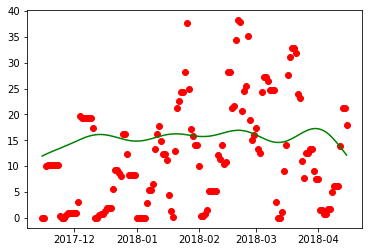

In [26]:
# let's plot the results for 2017-2018
plt.plot(dates[1][0]['ds'],dates[1][0]['yhat'], color='green') # line plot of the model
plt.scatter(dates[1][1]['ds'],dates[1][1]['y'], color='red') # scatter of the test
plt.plot(dates[1][2]['ds'],dates[1][2]['y'], color='blue') # line plot of the dummy model
plt.show()



That really doesn't look good. The model is barely any better than just guessing the mean

In [27]:
# let's add some regressors
# function - takes in dataframe to model and test (November 15 - April 15)


# manual loop for calculating error year by year
RMSE7 = []
dates = []
X7_dum = pd.DataFrame()

for yr in range(2016,2019):
    # split date between test and train data set
    split_date = str(yr) + '-11-14'
    # end date of the test set at the end of winter
    end_date = str(yr+1) + '-04-15'
    # takes all of the data before the split date
    X7_train = X7[X7['ds'] <= split_date]
    # data set from the split through the next winter
    X7_test = X7[(X7['ds'] <= end_date) & (X7['ds'] > split_date)]
    
    # create dummy model X - just a constant average throughout the season
    X7_dum['ds'] = X7_test['ds']
    X7_dum['y'] = X7_train[X7_train['ds'].dt.month.isin(['12','01','02','03','04'])]['y'].mean()
    
    # model based on the training data set
    m_fb = Prophet(yearly_seasonality = True, daily_seasonality=False, weekly_seasonality=False)
    m_fb.add_regressor('TMAX_7avg')
    m_fb.add_regressor('TMIN_7avg')
    m_fb.add_regressor('TOBS_7avg')
    m_fb.add_regressor('PDO')
    m_fb.add_regressor('AMO')
    m_fb.fit(X7_train)
    # predicts for 1 year based on that model
    future = m_fb.make_future_dataframe(periods=365)
    forecast = m_fb.predict(future)
    
    # split out that last winter from the prediction set
    compare = forecast[(forecast['ds'] <= end_date) & (forecast['ds'] > split_date)]
    # calculate the mean squared error
    RMSE = np.sqrt(mean_squared_error(X7_test['y'],compare['yhat']))
    #print(yr, compare['yhat'].shape, X7_test['y'].shape)
    dates.append([compare, X7_test, X7_dum])
    
    #calculate the RMSE for the dummy model
    RMSE_mean = np.sqrt(mean_squared_error(X7_test['y'], X7_dum['y']))
    
    
    # append the mean squared error to the list
    RMSE7.append([RMSE, RMSE_mean, RMSE - RMSE_mean])


# print the resulting MSE
print(RMSE7)

ValueError: Regressor 'TMAX_7avg' missing from dataframe

In [28]:
X7_train

,ds,TMAX_7avg,TMIN_7avg,TOBS_7avg,PDO,AMO,y,PRCP
0,1944-11-21,36.736971,18.821202,26.551428,-0.480000,0.272000,0.000000e+00,0.00
1,1944-11-22,36.468501,18.626804,26.318706,-0.480000,0.272000,0.000000e+00,0.00
2,1944-11-23,35.907657,18.275119,25.773843,-0.480000,0.272000,0.000000e+00,0.00
3,1944-11-24,35.602554,17.895432,25.561157,-0.480000,0.272000,0.000000e+00,0.82
4,1944-11-25,35.568962,17.693867,25.509994,-0.480000,0.272000,0.000000e+00,0.06
...,...,...,...,...,...,...,...,...
20526,2016-11-10,54.714286,35.000000,43.428571,0.735806,0.381387,-2.886580e-14,0.00
20527,2016-11-11,54.571429,34.857143,42.428571,0.780645,0.381710,-2.886580e-14,0.00
20528,2016-11-12,54.428571,35.000000,40.857143,0.825484,0.382032,-2.886580e-14,0.00
20529,2016-11-13,53.857143,34.714286,40.285714,0.870323,0.382355,-2.886580e-14,0.00


In [13]:
## code to check for missing dates in the data sets
# dates missing from X7_test in 2013-2014 winter
#set(dates[0][0]['ds']) ^ set(dates[0][1]['ds'])
# dates missing from X7_test in 2013-2014 winter
#set(dates[1][0]['ds']) ^ set(dates[1][1]['ds'])
# dates missing from X7_test in 2013-2014 winter
#set(dates[2][0]['ds']) ^ set(dates[2][1]['ds'])

set()

In [33]:
# Write the general version as a function
# let's add some regressors
# function - takes in dataframe to model and test (November 15 - April 15)

def find_error(X7):
    # manual loop for calculating error year by year
    RMSE7 = []
    dates = []
    X7_dum = pd.DataFrame()

    for yr in range(2016,2019):
        # split date between test and train data set
        split_date = str(yr) + '-11-14'
        # end date of the test set at the end of winter
        end_date = str(yr+1) + '-04-15'
        # takes all of the data before the split date
        X7_train = X7[X7['ds'] <= split_date]
        # data set from the split through the next winter
        X7_test = X7[(X7['ds'] <= end_date) & (X7['ds'] > split_date)]

        # create dummy model X - just a constant average throughout the season
        X7_dum['ds'] = X7_test['ds']
        X7_dum['y'] = X7_train[X7_train['ds'].dt.month.isin(['12','01','02','03','04'])]['y'].mean()

        # model based on the training data set
        m_fb = Prophet(yearly_seasonality = True, daily_seasonality=False, weekly_seasonality=False)
        #m_fb.add_regressor('TMAX_7avg')
        #m_fb.add_regressor('TMIN_7avg')
        #m_fb.add_regressor('TOBS_7avg')
        #m_fb.add_regressor('PDO')
        #m_fb.add_regressor('AMO')
        m_fb.fit(X7_train)
        # predicts for 1 year based on that model
        future = m_fb.make_future_dataframe(periods=365)
        forecast = m_fb.predict(future)

        # split out that last winter from the prediction set
        compare = forecast[(forecast['ds'] <= end_date) & (forecast['ds'] > split_date)]
        # calculate the mean squared error
        RMSE = np.sqrt(mean_squared_error(X7_test['y'],compare['yhat']))
        #print(yr, compare['yhat'].shape, X7_test['y'].shape)
        dates.append([compare, X7_test, X7_dum])

        #calculate the RMSE for the dummy model
        RMSE_mean = np.sqrt(mean_squared_error(X7_test['y'], X7_dum['y']))


        # append the mean squared error to the list
        RMSE7.append([RMSE, RMSE_mean, RMSE - RMSE_mean])


    # print the resulting MSE
    return RMSE7, dates


In [34]:
RMSE14, result14 = find_error(X14)

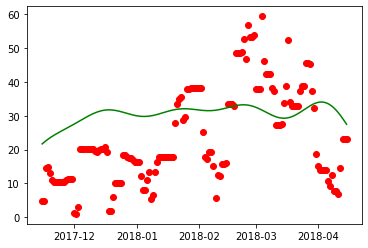

In [35]:
# let's plot the results for 2017-2018
plt.plot(result14[1][0]['ds'],result14[1][0]['yhat'], color='green') # line plot of the model
plt.scatter(result14[1][1]['ds'],result14[1][1]['y'], color='red') # scatter of the test
plt.plot(result14[1][2]['ds'],result14[1][2]['y'], color='blue') # line plot of the dummy model
plt.show()

In [36]:
print(RMSE14)

[[23.238396407895696, 22.229484963113315, 1.008911444782381], [14.799714566570866, 17.872804333129356, -3.073089766558489], [19.050003223009963, 18.554651992309427, 0.49535123070053544]]


In [37]:
RMSE30, result30 = find_error(X30)

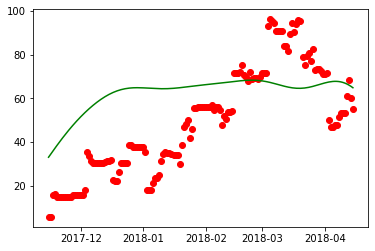

In [40]:
# let's plot the results for 2017-2018
plt.plot(result30[1][0]['ds'],result30[1][0]['yhat'], color='green') # line plot of the model
plt.scatter(result30[1][1]['ds'],result30[1][1]['y'], color='red') # scatter of the test
plt.show()

In [39]:
print(RMSE30)

[[32.52360269460425, 30.46005827377247, 2.0635444208317786], [24.106038864322844, 35.26600469056219, -11.159965826239347], [31.221121297685265, 32.17325755661382, -0.9521362589285545]]


That looks a lot more promising.